### Here I want to check accuracy of convolution sum(q_i, Green_i) of calculated sources

In [1]:
import numpy as np
from source_helper import *
import matplotlib.pyplot as plt
% matplotlib inline
from time import time
from lapl_well import LaplWell
from helper import Helper
from well import Well
import pandas as pd

In [3]:
# define a well in real space
xwd = 0.
ywd = 0.
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
n_stehf = 12
params = {"nseg": 20, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":10, "ref_length":1.,
         "z_ref_length": 1}
real_well = Well(xwd, ywd, outer_bound, top_bound, bottom_bound, wtype, params, n_stehf)
lapl_well = real_well.lapl_well

In [7]:
ts = np.logspace(-3,0,31)
ss = np.log(2.)/ts

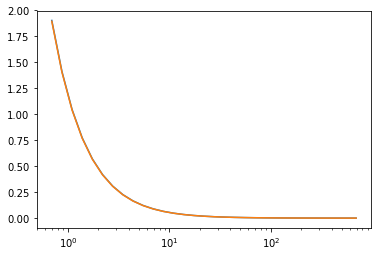

In [22]:
helper = Helper()
ps = np.array([])
convs = np.array([])
for s in ss:
    lapl_well.recalc(s)
    ps = np.append(ps, lapl_well.p_lapl)
    sources = lapl_well.source_distrib
    gr_vect = helper.get_green_vector(lapl_well, xwd, ywd, 0, s)
    convs = np.append(convs, np.sum(sources*gr_vect))
plt.plot(ss, ps)
plt.plot(ss, convs)
plt.xscale("log")